## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [1]:
# import drive to Google Colab
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.

  Hints: To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [2]:
# display the CSV file into a Dataframe
ecom = pd.read_csv('/content/drive/MyDrive/MQ 2024/[S1] COMP6200/[COMP6200] Portfolio 2/cleaned_ecommerce_dataset.csv')
ecom.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [3]:
# explore the data
ecom.info()
print("Length of data:", len(ecom))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB
Length of data: 2685


In [4]:
obj_ecom = ecom.select_dtypes(include=['object']).copy()
obj_ecom.head()

,review,item,gender,category
0,Not always McCrap,McDonald's,M,Restaurants & Gourmet
1,I dropped the chalupa even before he told me to,Taco Bell,M,Restaurants & Gourmet
2,The Wonderful World of Wendy,Wendy's,M,Restaurants & Gourmet
3,They actually did it,"South Park: Bigger, Longer & Uncut",M,Movies
4,Hey! Gimme some pie!,American Pie,M,Movies


In [5]:
# Encode variable "gender" containing categorical values
ecom['gender'].unique() # inspect unique values of "gender"
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
obj_ecom["gender_code"] = ord_enc.fit_transform(obj_ecom[["gender"]])
obj_ecom[["gender", "gender_code"]].head(5)

,gender,gender_code
0,M,1.0
1,M,1.0
2,M,1.0
3,M,1.0
4,M,1.0


In [6]:
ecom['gender'] = obj_ecom["gender_code"]

In [7]:
# Compute correlation between gender and rating
cor1 = ecom['gender'].corr(ecom['rating'])
print(cor1)

-0.03433661424208268


In [8]:
# Encode variable "gender" containing categorical values
ecom['category'].unique() # inspect unique values of "category"

obj_ecom["cat_code"] = ord_enc.fit_transform(obj_ecom[["category"]])
obj_ecom[["category", "cat_code"]].head(5)

,category,cat_code
0,Restaurants & Gourmet,8.0
1,Restaurants & Gourmet,8.0
2,Restaurants & Gourmet,8.0
3,Movies,5.0
4,Movies,5.0


In [9]:
ecom['category'] = obj_ecom["cat_code"]

In [10]:
# Compute correlation between category and rating
cor2 = ecom['category'].corr(ecom['rating'])
print(cor2)

-0.16315765340915644


In [11]:
# Encode variable "gender" containing categorical values
ecom['review'].unique() # inspect unique values of "review"

obj_ecom["review_code"] = ord_enc.fit_transform(obj_ecom[["review"]])
obj_ecom[["review", "review_code"]].head(5)

,review,review_code
0,Not always McCrap,1618.0
1,I dropped the chalupa even before he told me to,1125.0
2,The Wonderful World of Wendy,2185.0
3,They actually did it,2243.0
4,Hey! Gimme some pie!,1033.0


In [12]:
ecom['review'] = obj_ecom["review_code"]

In [13]:
# Compute correlation between review and rating
cor3 = ecom['review'].corr(ecom['rating'])
print(cor3)

-0.03611838655212237


In [14]:
# Compute correlation between helpfulness and rating
cor4 = ecom["helpfulness"].corr(ecom['rating'])
print(cor4)

-0.00752333772684455


In summary, we have:
* cor[gender] = -0.03433661424208268
* cor[category] = -0.16315765340915644
* cor[review] = -0.03611838655212237
* cor[helpfulness] = -0.00752333772684455

Thus, the two features with the highest absolute correlations to "rating" are "category" and "review", while the least absolute correlations to "rating" are gender and helpfulness.

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [15]:
# import necessary libraries

import pandas as pd # load dataframe
import numpy as np # transform dataframe into matrix
from sklearn.model_selection import train_test_split # linear model
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [16]:
# Case 1: training data containing 10% of the entire data
trainC1, testC1 = train_test_split(ecom, test_size=0.9, random_state=111) # split the data into training (10%) and testing sets (90%)

# inspect the structure of the training and the testing sets
print(trainC1.shape)
print(testC1.shape)

(268, 11)
(2417, 11)


In [17]:
# Case 2: training data containing 90% of the entire data
trainC2, testC2 = train_test_split(ecom, test_size=0.1, random_state=111) # split the data into training (90%) and testing sets (10%)

# inspect the structure of the training and the testing sets
print(trainC2.shape)
print(testC2.shape)

(2416, 11)
(269, 11)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features from helpfulness/gender/category/review regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [18]:
"""
As the two most correlated features with "rating" are "review" and "category", we have Model-a and Model-c using these two features
to predict "rating". Similarly, as the two least correlated featrues with "rating" are "category" and "gender", we have
Model-b and Model-d using these two features to predict "rating".


"""
# Model-a - linear regression model
regA = linear_model.LinearRegression()
X_trainA = trainC1[['review', 'category']]
y_trainA = trainC1['rating']

regA.fit(X_trainA, y_trainA)
print("y_trainA = X_trainA *", regA.coef_, "+", regA.intercept_)


y_trainA = X_trainA * [-5.44778842e-05 -1.48097573e-01] + 4.68428323021492


In [19]:
# Model-b - linear regression model
regB = linear_model.LinearRegression()
X_trainB = trainC1[['gender','helpfulness']]
y_trainB = trainC1['rating']

regB.fit(X_trainB, y_trainB)
print("y_trainB = X_trainB *", regB.coef_, "+", regB.intercept_)


y_trainB = X_trainB * [-0.25256228  0.06373048] + 3.7393210274945163


In [20]:
# Model-c - linear regression model
regC = linear_model.LinearRegression()
X_trainC = trainC2[['review', 'category']]
y_trainC = trainC2['rating']

regC.fit(X_trainC, y_trainC)
print("y_trainC = X_trainC *", regC.coef_, "+", regC.intercept_)


y_trainC = X_trainC * [-8.04523258e-05 -1.27035232e-01] + 4.442478720854616


In [21]:
# Model-d - linear regression model
regD = linear_model.LinearRegression()
X_trainD = trainC2[['gender','helpfulness']]
y_trainD = trainC2['rating']

regD.fit(X_trainD, y_trainD)
print("y_trainD = X_trainD *", regD.coef_, "+", regD.intercept_)


y_trainD = X_trainD * [-0.10564057 -0.01847914] + 3.8268986577321993


### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [22]:
# Model-a evaluation metrics
X_testA = testC1[['review', 'category']]
y_testA = testC1['rating']

predicted_A = regA.predict(X_testA)
mse_A = ((np.array(y_testA)-predicted_A)**2).sum()/len(y_testA)

print("MSE_A:", mse_A)
print("Root MSE A:",np.sqrt(mse_A))


MSE_A: 1.8255856608081693
Root MSE A: 1.35114235401314


In [23]:
# Model-b evaluation metrics
X_testB = testC1[['gender','helpfulness']]
y_testB = testC1['rating']


predicted_B = regB.predict(X_testB)
mse_B = ((np.array(y_testB)-predicted_B)**2).sum()/len(y_testB)

print("MSE_B:", mse_B)
print("Root MSE B:",np.sqrt(mse_B))


MSE_B: 1.8745326806658162
Root MSE B: 1.3691357422351578


In [24]:
# Model-c evaluation metrics
X_testC = testC2[['review', 'category']]
y_testC = testC2['rating']


predicted_C = regC.predict(X_testC)
mse_C = ((np.array(y_testC)-predicted_C)**2).sum()/len(y_testC)

print("MSE_C:", mse_C)
print("Root MSE C:",np.sqrt(mse_C))


MSE_C: 1.7007172303800724
Root MSE C: 1.3041154973314566


In [25]:
# Model-d evaluation metrics
X_testD = testC2[['gender','helpfulness']]
y_testD = testC2['rating']


predicted_D = regD.predict(X_testD)
mse_D = ((np.array(y_testD)-predicted_D)**2).sum()/len(y_testD)

print("MSE_D:", mse_D)
print("Root MSE D:",np.sqrt(mse_D))


MSE_D: 1.73602394100262
Root MSE D: 1.3175826125911878


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

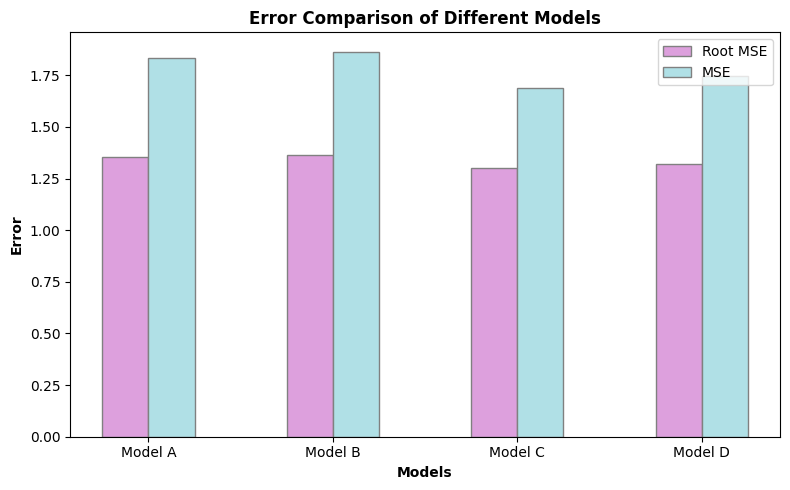

In [26]:
# to prepare the data for the combined bar chart
models = ['Model A', 'Model B', 'Model C', 'Model D']
mse_values = [1.8334986000270228, 1.8648315950996253, 1.6892618567839999, 1.7454935696261649]
root_mse_values = [1.3540674281685616, 1.3655883695680866, 1.2997160677563389, 1.321171287012462]

# to decide the width of each bar
bar_width = 0.25

# to set positions for the bars
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# to plot the combined bar chart based on customised size
plt.figure(figsize=(8, 5))

# to plot root MSE
plt.bar(r1, root_mse_values, color='plum', width=bar_width, edgecolor='grey', label='Root MSE')

# to plot MSE
plt.bar(r2, mse_values, color='powderblue', width=bar_width, edgecolor='grey', label='MSE')

# to add labels to the chart
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Error', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(models))], models)
plt.title('Error Comparison of Different Models', fontweight='bold')
plt.legend()

# to show the bar chart
plt.tight_layout()
plt.show()

In summary, we have the computed Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) values in the previous part as follows:

Model-a:
*   MSE_A: 1.8255856608081693
*   Root MSE A: 1.35114235401314

Model-b:
* MSE_B: 1.8745326806658162
* Root MSE B: 1.3691357422351578

Model-c:
* MSE_C: 1.7007172303800724
* Root MSE C: 1.3041154973314566

Model-d:
* MSE_D: 1.73602394100262
* Root MSE D: 1.3175826125911878

As also shown in the bar chart, it indicates that:
1.   **Model-c** has the lowest MSE (1.701) and RMSE (1.304) among all models, indicating better predictive performance. This model uses 90% of the entire data for training and features "review" and "category," which are the two most correlated features with "rating."
2.   **Model-a** follows closely behind Model-c in terms of performance, with slightly higher MSE and RMSE values. It also uses the two most correlated features with "rating" but with only 10% of the data for training.
3.   **Model-d** performs slightly worse than Model-c, but still better than Model-a and Model-b. It also utilizes the two most correlated features with "rating" but with 90% of the data for training.
4.   **Model-b** shows the least performance among all models, with the highest MSE (1.8745326806658162) and RMSE (1.3691357422351578). This model uses the two least correlated features with "rating," "category," and "gender," with only 10% of the data for training.

In conclusion, **Model-c performs the best**, likely because it benefits from both using the most correlated features and having a larger training dataset, leading to better predictive accuracy. On the other hand, **Model-b performs the least** due to its reliance on the least correlated features and the smallest training dataset.



---



### Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


When we look at the image, it is clear that even though both infographics use the same data, the audience might have with different opinions about how well each country is performing based on the charts they see.

According to Bresciani and Eppler(2015), misinformation comes in two types: intentional, when it is done on purpose, and unintentional, when it is accidental. However, it is evident a considerable downside of infographics: they can be used intentionally or unintentionally to influence the readers' views depending on how the data is presented. On one hand, this opens the door to misinformation or manipulation. On the other hand, the way infographics are framed can introduce accidentally biases or stereotypes, which can worsen inequalities or reinforce harmful ideas about certain groups in the society.

Therefore, while infographics are undoubtably useful for showing information visually, we need to be careful about how they're made and what they're saying to avoid spreading false ideas or stereotypes. Making sure infographics are clear, accurate, and respectful is important to help everyone understand complex issues fairly.


---

